In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50

In [2]:
df_plotting = pd.read_csv('Data_Marketing_Customer_Analysis_Round2.csv')

In [3]:
df_plotting

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [4]:
df_plotting = df_plotting.drop_duplicates()

In [5]:
df_plotting.select_dtypes(include=object).head()

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN


In [6]:
## df_plotting["Effective To Date"].replace(df_plotting["Effective To Date"].str.startswith("1"), "January")

In [7]:
for i in df_plotting["Effective To Date"]:
    if i.startswith("1"): 
        i = "January"
    else:
        i = "blah"

In [8]:
df_plotting["Effective To Date"]

0        2/18/11
1        1/18/11
2        2/10/11
3        1/11/11
4        1/17/11
          ...   
10905    1/19/11
10906     1/6/11
10907     2/6/11
10908    2/13/11
10909     1/8/11
Name: Effective To Date, Length: 10910, dtype: object

In [9]:
df_plotting.columns

Index(['Unnamed: 0', 'Customer', 'State', 'Customer Lifetime Value',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size',
       'Vehicle Type'],
      dtype='object')

In [10]:
df_plotting.drop(columns=["Unnamed: 0"], inplace = True)

In [11]:
df_plotting.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'Vehicle Type'],
      dtype='object')

In [12]:
types_columns_cat = df_plotting.select_dtypes(include=object)

In [13]:
types_columns_cat

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


In [14]:
types_columns_int = df_plotting.select_dtypes(include=int)
types_columns_int

,Income,Monthly Premium Auto,Months Since Policy Inception,Number of Policies
0,48029,61,52,9
1,0,64,26,1
2,22139,100,31,2
3,49078,97,3,2
4,23675,117,31,7
...,...,...,...,...
10905,0,253,40,7
10906,61146,65,68,6
10907,39837,201,63,2
10908,64195,158,27,6


In [15]:
types_columns_float = df_plotting.select_dtypes(include=float)
types_columns_float

,Customer Lifetime Value,Months Since Last Claim,Number of Open Complaints,Total Claim Amount
0,4809.216960,7.0,0.0,292.800000
1,2228.525238,3.0,0.0,744.924331
2,14947.917300,34.0,0.0,480.000000
3,22332.439460,10.0,0.0,484.013411
4,9025.067525,NaN,NaN,707.925645
...,...,...,...,...
10905,15563.369440,NaN,NaN,1214.400000
10906,5259.444853,7.0,0.0,273.018929
10907,23893.304100,11.0,0.0,381.306996
10908,11971.977650,0.0,4.0,618.288849


In [16]:
types_columns_num = pd.concat([types_columns_int, types_columns_float], axis=1)

In [17]:
types_columns_num 

,Income,Monthly Premium Auto,Months Since Policy Inception,Number of Policies,Customer Lifetime Value,Months Since Last Claim,Number of Open Complaints,Total Claim Amount
0,48029,61,52,9,4809.216960,7.0,0.0,292.800000
1,0,64,26,1,2228.525238,3.0,0.0,744.924331
2,22139,100,31,2,14947.917300,34.0,0.0,480.000000
3,49078,97,3,2,22332.439460,10.0,0.0,484.013411
4,23675,117,31,7,9025.067525,NaN,NaN,707.925645
...,...,...,...,...,...,...,...,...
10905,0,253,40,7,15563.369440,NaN,NaN,1214.400000
10906,61146,65,68,6,5259.444853,7.0,0.0,273.018929
10907,39837,201,63,2,23893.304100,11.0,0.0,381.306996
10908,64195,158,27,6,11971.977650,0.0,4.0,618.288849


In [18]:
## Use seaborn library to construct distribution plots for the numerical variables

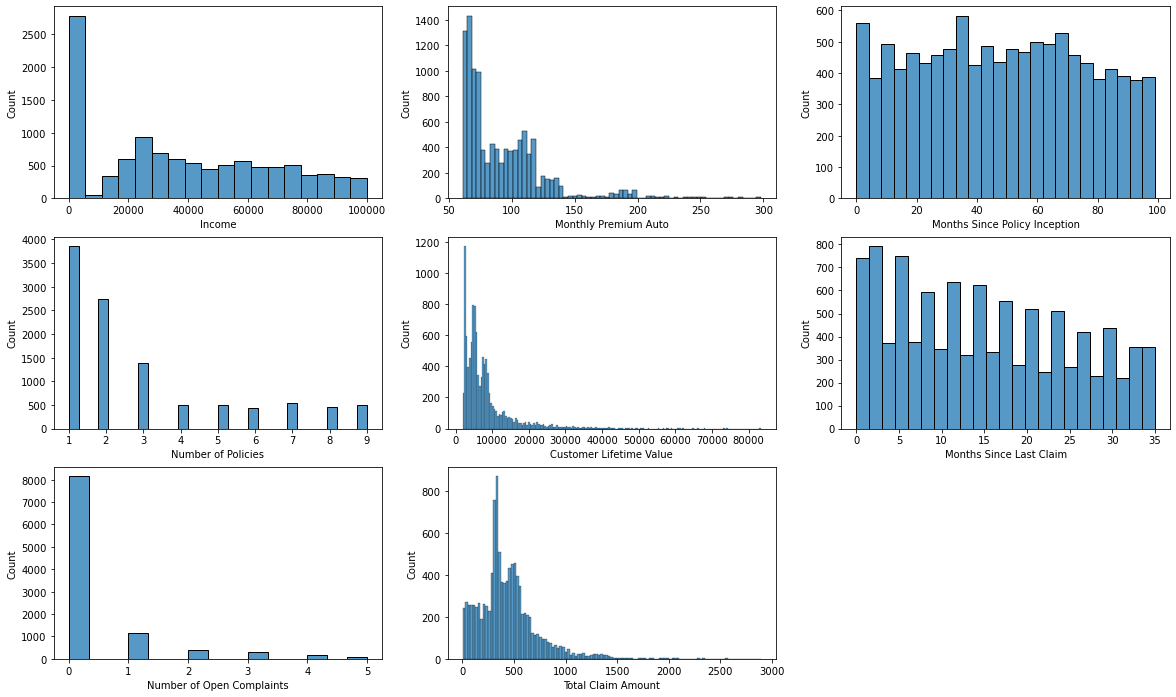

In [19]:
plt.figure(figsize=(20,12))
for i, column in enumerate(types_columns_num,1):
    plt.subplot(3,3,i)
    sns.histplot(types_columns_num[column])

In [20]:
## normalized_numerical = (types_columns_num-types_columns_num.min())/(types_columns_num.max()-types_columns_num.min())

In [21]:
## normalized_numerical

,Income,Monthly Premium Auto,Months Since Policy Inception,Number of Policies,Customer Lifetime Value,Months Since Last Claim,Number of Open Complaints,Total Claim Amount
0,0.480381,0.000000,0.525253,1.000,0.035752,0.200000,0.0,0.101171
1,0.000000,0.012658,0.262626,0.000,0.004059,0.085714,0.0,0.257445
2,0.221432,0.164557,0.313131,0.125,0.160264,0.971429,0.0,0.165875
3,0.490873,0.151899,0.030303,0.125,0.250953,0.285714,0.0,0.167263
4,0.236795,0.236287,0.313131,0.750,0.087527,NaN,NaN,0.244657
...,...,...,...,...,...,...,...,...
10905,0.000000,0.810127,0.404040,0.750,0.167823,NaN,NaN,0.419717
10906,0.611576,0.016878,0.686869,0.625,0.041281,0.200000,0.0,0.094333
10907,0.398446,0.590717,0.636364,0.125,0.270122,0.314286,0.0,0.131763
10908,0.642072,0.409283,0.272727,0.625,0.123717,0.000000,0.8,0.213674


plt.figure(figsize=(20,12))
for i, column in enumerate(normalized_numerical,1):
    plt.subplot(3,3,i)
    sns.histplot(normalized_numerical[column])

In [20]:
import statistics as stats

In [23]:
##Q1_TCA = np.percentile(types_columns_num['Total Claim Amount'], 25)
## Q1_TCA

In [52]:
## Q3_TCA = np.percentile(types_columns_num['Total Claim Amount'], 75)
## Q3_TCA

In [53]:
## IQR_Total_Claim_Amount = Q3_TCA - Q1_TCA
## IQR_Total_Claim_Amount

In [54]:
## max_Total_Claim_Amount = types_columns_num['Total Claim Amount'] <= (Q3_TCA + 1.5 * IQR_Total_Claim_Amount)
## max_Total_Claim_Amount

In [55]:
## cleaned_TCA = types_columns_num['Total Claim Amount'][max_Total_Claim_Amount]

In [21]:
plt.figure(figsize=(20,12))
sns.histplot(cleaned_TCA)

NameError: name 'cleaned_TCA' is not defined

<Figure size 1440x864 with 0 Axes>

In [22]:
Q1_CTV = np.percentile(types_columns_num['Customer Lifetime Value'], 25)
Q1_CTV

4014.453113

In [23]:
Q3_CTV = np.percentile(types_columns_num['Customer Lifetime Value'], 75)
Q3_CTV

8992.779137

In [24]:
IQR_CTV = Q3_CTV - Q1_CTV
IQR_CTV

4978.326024

In [26]:
max_CTV = types_columns_num['Customer Lifetime Value'] <= (Q3_CTV + 1.5 * IQR_CTV)
max_CTV

0         True
1         True
2         True
3        False
4         True
         ...  
10905     True
10906     True
10907    False
10908     True
10909     True
Name: Customer Lifetime Value, Length: 10910, dtype: bool

In [21]:
cleaned_CTV = types_columns_num['Customer Lifetime Value'][max_CTV]

NameError: name 'max_CTV' is not defined

In [22]:
df_plotting

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [23]:
plt.figure(figsize=(20,12))
sns.histplot(cleaned_CTV)

NameError: name 'cleaned_CTV' is not defined

<Figure size 1440x864 with 0 Axes>

In [37]:
Q1_MPA = np.percentile(types_columns_num['Monthly Premium Auto'], 25)
Q1_MPA

68.0

In [38]:
Q3_MPA = np.percentile(types_columns_num['Monthly Premium Auto'], 75)
Q3_MPA

109.0

In [39]:
IQR_MPA = Q3_MPA - Q1_MPA
IQR_MPA

41.0

In [40]:
max_MPA = types_columns_num['Monthly Premium Auto'] <= (Q3_MPA + 1.5 * IQR_MPA)
max_MPA

0         True
1         True
2         True
3         True
4         True
         ...  
10905    False
10906     True
10907    False
10908     True
10909     True
Name: Monthly Premium Auto, Length: 10910, dtype: bool

In [41]:
cleaned_MPA = types_columns_num['Monthly Premium Auto'][max_MPA]

<AxesSubplot:xlabel='Monthly Premium Auto', ylabel='Count'>

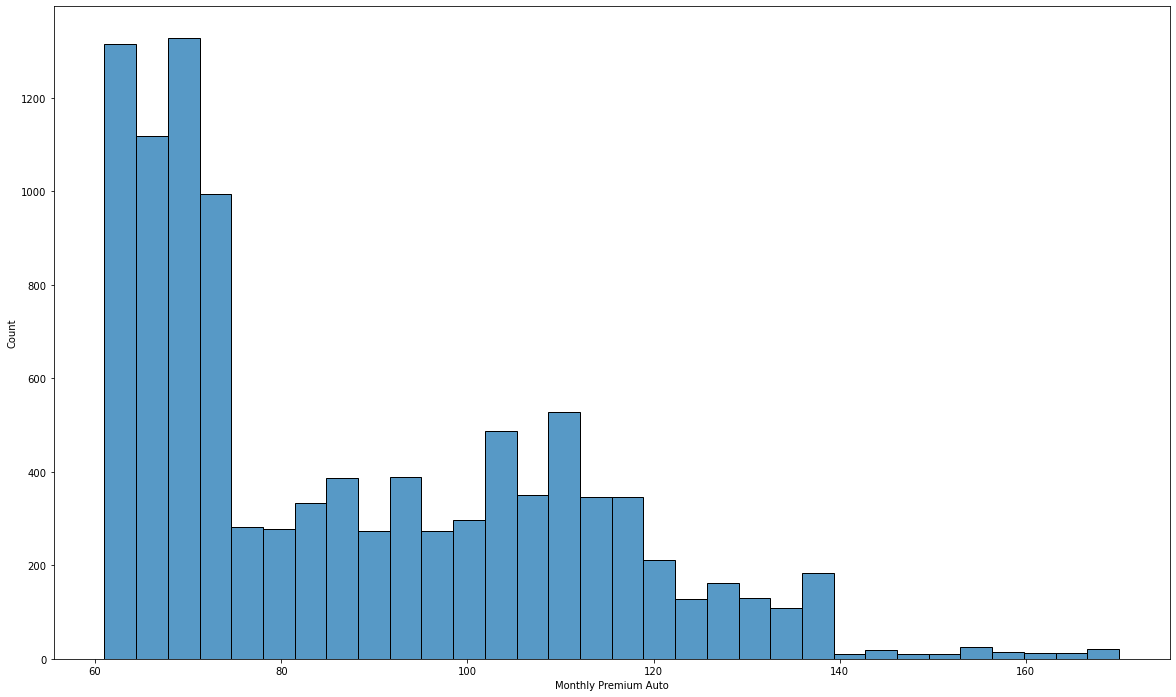

In [42]:
plt.figure(figsize=(20,12))
sns.histplot(cleaned_MPA)

In [24]:
types_columns_num.describe()

,Income,Monthly Premium Auto,Months Since Policy Inception,Number of Policies,Customer Lifetime Value,Months Since Last Claim,Number of Open Complaints,Total Claim Amount
count,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10277.000000,10277.000000,10910.000000
mean,37536.284785,93.196059,48.091934,2.979193,8018.241094,15.149071,0.384256,434.888330
std,30359.195670,34.442532,27.940675,2.399359,6885.081434,10.080349,0.912457,292.180556
min,0.000000,61.000000,0.000000,1.000000,1898.007675,0.000000,0.000000,0.099007
25%,0.000000,68.000000,24.000000,1.000000,4014.453113,6.000000,0.000000,271.082527
50%,33813.500000,83.000000,48.000000,2.000000,5771.147235,14.000000,0.000000,382.564630
75%,62250.750000,109.000000,71.000000,4.000000,8992.779137,23.000000,0.000000,547.200000
max,99981.000000,298.000000,99.000000,9.000000,83325.381190,35.000000,5.000000,2893.239678


In [45]:
df_plotting

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [70]:
### Use Matplotlib to construct histograms

In [25]:
zscore=(types_columns_num-types_columns_num.mean())/types_columns_num.std()
types_columns_num.mean()

Income                           37536.284785
Monthly Premium Auto                93.196059
Months Since Policy Inception       48.091934
Number of Policies                   2.979193
Customer Lifetime Value           8018.241094
Months Since Last Claim             15.149071
Number of Open Complaints            0.384256
Total Claim Amount                 434.888330
dtype: float64

In [47]:
zscore

,Income,Monthly Premium Auto,Months Since Policy Inception,Number of Policies,Customer Lifetime Value,Months Since Last Claim,Number of Open Complaints,Total Claim Amount
0,0.345619,-0.934776,0.139870,2.509340,-0.466084,-0.808412,-0.421122,-0.486303
1,-1.236406,-0.847675,-0.790673,-0.824884,-0.840907,-1.205223,-0.421122,1.061111
2,-0.507170,0.197545,-0.611722,-0.408106,1.006477,1.870067,-0.421122,0.154397
3,0.380172,0.110443,-1.613846,-0.408106,2.079017,-0.510803,-0.421122,0.168133
4,-0.456576,0.691121,-0.611722,1.675784,0.146233,NaN,NaN,0.934481
...,...,...,...,...,...,...,...,...
10905,-1.236406,4.639727,-0.289611,1.675784,1.095866,NaN,NaN,2.667911
10906,0.777679,-0.818641,0.712512,1.259006,-0.400692,-0.808412,-0.421122,-0.554005
10907,0.075783,3.129966,0.533561,-0.408106,2.305719,-0.411600,-0.421122,-0.183384
10908,0.878110,1.881509,-0.754883,1.259006,0.574247,-1.502832,3.962645,0.627696


In [26]:
zscore_contin = zscore.drop(["Number of Policies", "Number of Open Complaints"], axis = 1)

In [49]:
df_plotting

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [50]:
zscore_contin

,Income,Monthly Premium Auto,Months Since Policy Inception,Customer Lifetime Value,Months Since Last Claim,Total Claim Amount
0,0.345619,-0.934776,0.139870,-0.466084,-0.808412,-0.486303
1,-1.236406,-0.847675,-0.790673,-0.840907,-1.205223,1.061111
2,-0.507170,0.197545,-0.611722,1.006477,1.870067,0.154397
3,0.380172,0.110443,-1.613846,2.079017,-0.510803,0.168133
4,-0.456576,0.691121,-0.611722,0.146233,NaN,0.934481
...,...,...,...,...,...,...
10905,-1.236406,4.639727,-0.289611,1.095866,NaN,2.667911
10906,0.777679,-0.818641,0.712512,-0.400692,-0.808412,-0.554005
10907,0.075783,3.129966,0.533561,2.305719,-0.411600,-0.183384
10908,0.878110,1.881509,-0.754883,0.574247,-1.502832,0.627696


In [51]:
correlations = zscore_contin.iloc[:,0:4].corr()

In [52]:
correlations

,Income,Monthly Premium Auto,Months Since Policy Inception,Customer Lifetime Value
Income,1.000000,-0.009788,-0.005903,0.028306
Monthly Premium Auto,-0.009788,1.000000,0.018953,0.403069
Months Since Policy Inception,-0.005903,0.018953,1.000000,0.016960
Customer Lifetime Value,0.028306,0.403069,0.016960,1.000000


In [53]:
zscore_contin.columns[0:4]

Index(['Income', 'Monthly Premium Auto', 'Months Since Policy Inception',
       'Customer Lifetime Value'],
      dtype='object')

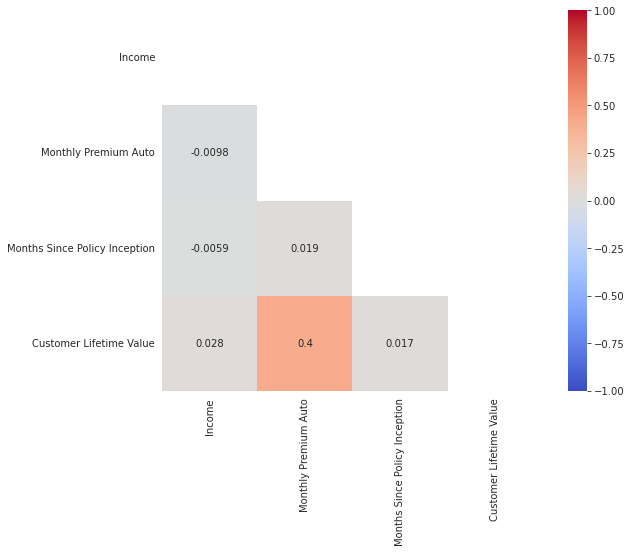

In [54]:
mask = np.zeros_like(correlations)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax =plt.subplots(figsize=(9, 7))
    multicollinearity_ax = sns.heatmap(correlations, mask=mask, cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

In [55]:
types_columns_cat

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


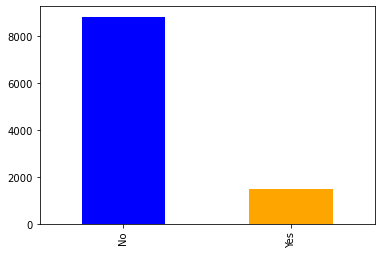

In [56]:
#Show a plot of the total number of responses.
Response_graph = types_columns_cat['Response'].value_counts().plot(kind='bar', color=['blue', 'orange'])

<AxesSubplot:>

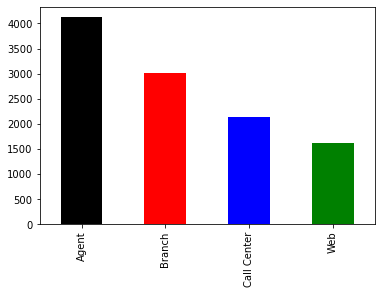

In [57]:
#Show a plot of the response rate by the sales channel.
types_columns_cat['Sales Channel'].value_counts().plot(kind='bar', color=['black', 'red', 'blue', 'green'])

In [58]:
#Show a plot of the response rate by the total claim amount.
response_TCA = pd.concat([types_columns_cat['Response'], types_columns_num['Total Claim Amount']], axis=1)
response_TCA

,Response,Total Claim Amount
0,No,292.800000
1,No,744.924331
2,No,480.000000
3,Yes,484.013411
4,No,707.925645
...,...,...
10905,No,1214.400000
10906,No,273.018929
10907,No,381.306996
10908,No,618.288849


<AxesSubplot:title={'center':'response rate by the total claim amount'}, xlabel='Response', ylabel='Total Claim Amount'>

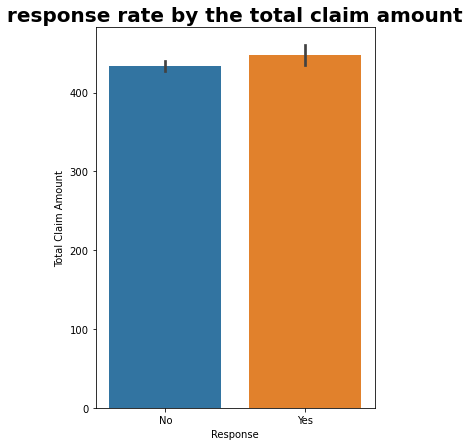

In [59]:
f_resp_TCA, ax_resp_TCA = plt.subplots(figsize = (5,7))
ax_resp_TCA.set_title('response rate by the total claim amount', size='20', fontweight='bold')
sns.barplot(x = response_TCA['Response'],y = response_TCA['Total Claim Amount'], ax = ax_resp_TCA)

In [60]:
# Show a plot of the response rate by income.
response_income = pd.concat([types_columns_cat['Response'], types_columns_num['Income']], axis=1)
response_income

,Response,Income
0,No,48029
1,No,0
2,No,22139
3,Yes,49078
4,No,23675
...,...,...
10905,No,0
10906,No,61146
10907,No,39837
10908,No,64195


<AxesSubplot:title={'center':'response rate by income'}, xlabel='Response', ylabel='Income'>

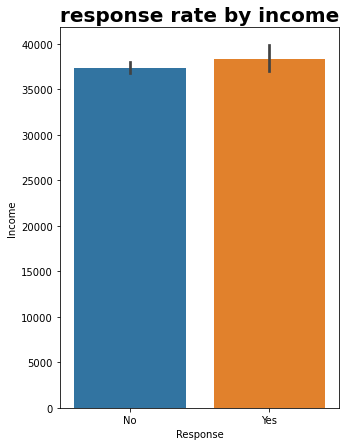

In [61]:
f_resp_income, ax_resp_income = plt.subplots(figsize = (5,7))
ax_resp_income.set_title('response rate by income', size='20', fontweight='bold')
sns.barplot(x = response_TCA['Response'],y = types_columns_num['Income'], ax = ax_resp_income)

In [62]:
creativity = pd.concat([types_columns_cat['Gender'], types_columns_num['Monthly Premium Auto'], types_columns_num['Customer Lifetime Value']], axis=1)
creativity

,Gender,Monthly Premium Auto,Customer Lifetime Value
0,M,61,4809.216960
1,F,64,2228.525238
2,M,100,14947.917300
3,M,97,22332.439460
4,F,117,9025.067525
...,...,...,...
10905,F,253,15563.369440
10906,F,65,5259.444853
10907,F,201,23893.304100
10908,F,158,11971.977650


In [63]:
sns.set_palette('RdYlGn')
palette_alive = {"M": "C5", "F": "C0"}

<AxesSubplot:title={'center':'Customer Lifetime Value by Monthly Premium Auto'}, xlabel='Monthly Premium Auto', ylabel='Customer Lifetime Value'>

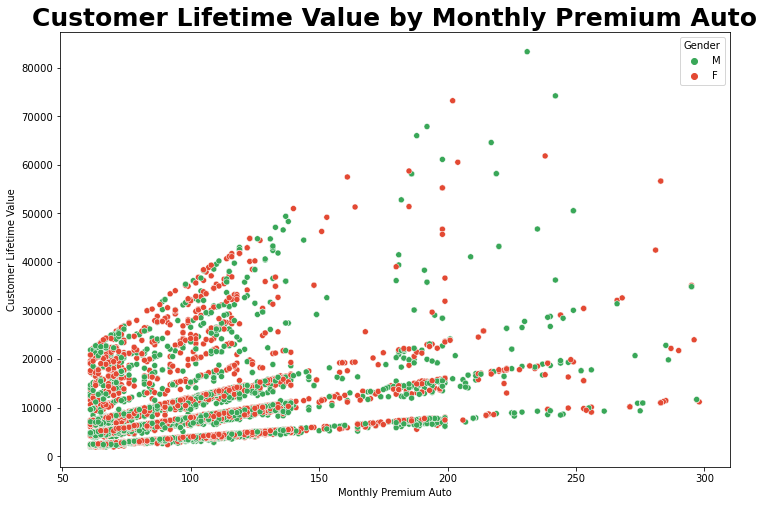

In [64]:
fig4, ax4 = plt.subplots(figsize = (12,8))
ax4.set_title('Customer Lifetime Value by Monthly Premium Auto', size='25', fontweight='bold')
sns.scatterplot(x = creativity['Monthly Premium Auto'],y = creativity['Customer Lifetime Value'], 
            hue = creativity['Gender'], ax = ax4, palette=palette_alive)

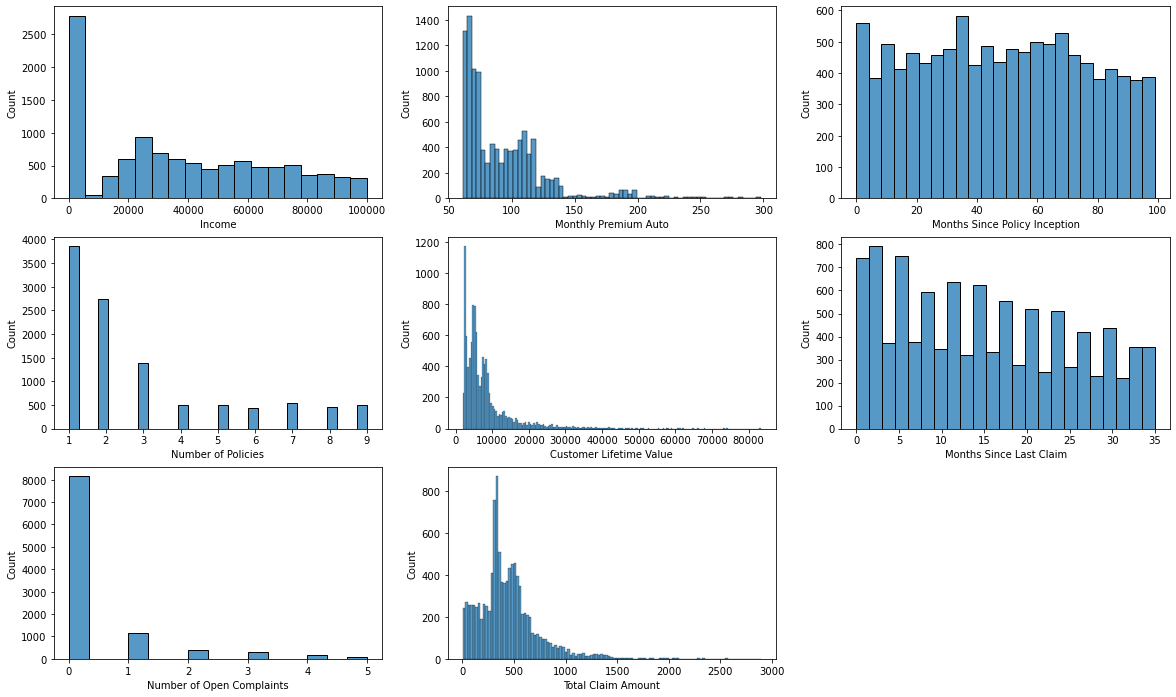

In [27]:
plt.figure(figsize=(20,12))
for i, column in enumerate(types_columns_num,1):
    plt.subplot(3,3,i)
    sns.histplot(types_columns_num[column])

In [66]:
median_income = df_plotting['Income'].median()

In [29]:
types_columns_num['Income']=types_columns_num['Income'].replace(0,np.nan)

<AxesSubplot:xlabel='Income', ylabel='Count'>

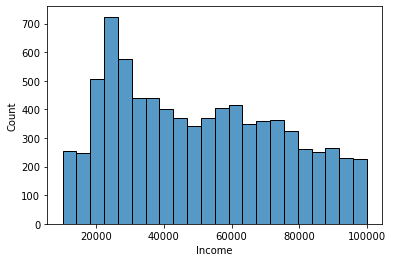

In [30]:
sns.histplot(types_columns_num['Income'])

In [69]:
cleaned_CTV

0         4809.216960
1         2228.525238
2        14947.917300
4         9025.067525
5         4745.181764
             ...     
10903     2771.663013
10905    15563.369440
10906     5259.444853
10908    11971.977650
10909     6857.519928
Name: Customer Lifetime Value, Length: 9926, dtype: float64

In [70]:
## df_plotting["cleaned_CTV"] = cleaned_CTV

In [71]:
## df_plotting

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type,cleaned_CTV
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029.0,...,9.0,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN,4809.216960
1,33813.5,33813.5,33813.500000,33813.5,33813.5,33813.5,33813.5,33813.5,33813.5,33813.5,...,33813.5,33813.5,33813.5,33813.5,33813.5,33813.500000,33813.5,33813.5,33813.5,2228.525238
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139.0,...,2.0,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,14947.917300
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078.0,...,2.0,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,NaN
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675.0,...,7.0,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN,9025.067525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,33813.5,33813.5,33813.500000,33813.5,33813.5,33813.5,33813.5,33813.5,33813.5,33813.5,...,33813.5,33813.5,33813.5,33813.5,33813.5,33813.500000,33813.5,33813.5,33813.5,15563.369440
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146.0,...,6.0,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,5259.444853
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837.0,...,2.0,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN,NaN
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195.0,...,6.0,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,11971.977650


In [72]:
## numerical.drop(numerical[numerical['monthly premium auto'] > max_MPA].index, inplace=True)

In [75]:
## types_columns_num["Income"].fillna(types_columns_num["Income"].median(),inplace = True)

In [81]:
types_columns_num

,Income,Monthly Premium Auto,Months Since Policy Inception,Number of Policies,Customer Lifetime Value,Months Since Last Claim,Number of Open Complaints,Total Claim Amount
0,48029.0,61.0,52.0,9.0,4809.216960,7.0,0.0,292.800000
1,33813.5,33813.5,33813.5,33813.5,33813.500000,33813.5,33813.5,33813.500000
2,22139.0,100.0,31.0,2.0,14947.917300,34.0,0.0,480.000000
3,49078.0,97.0,3.0,2.0,22332.439460,10.0,0.0,484.013411
4,23675.0,117.0,31.0,7.0,9025.067525,NaN,NaN,707.925645
...,...,...,...,...,...,...,...,...
10905,33813.5,33813.5,33813.5,33813.5,33813.500000,33813.5,33813.5,33813.500000
10906,61146.0,65.0,68.0,6.0,5259.444853,7.0,0.0,273.018929
10907,39837.0,201.0,63.0,2.0,23893.304100,11.0,0.0,381.306996
10908,64195.0,158.0,27.0,6.0,11971.977650,0.0,4.0,618.288849


In [19]:
types_columns_num['Income']=types_columns_num['Income'].replace(0,types_columns_num['Income'].median())

In [20]:
types_columns_num

,Income,Monthly Premium Auto,Months Since Policy Inception,Number of Policies,Customer Lifetime Value,Months Since Last Claim,Number of Open Complaints,Total Claim Amount
0,48029.0,61,52,9,4809.216960,7.0,0.0,292.800000
1,33813.5,64,26,1,2228.525238,3.0,0.0,744.924331
2,22139.0,100,31,2,14947.917300,34.0,0.0,480.000000
3,49078.0,97,3,2,22332.439460,10.0,0.0,484.013411
4,23675.0,117,31,7,9025.067525,NaN,NaN,707.925645
...,...,...,...,...,...,...,...,...
10905,33813.5,253,40,7,15563.369440,NaN,NaN,1214.400000
10906,61146.0,65,68,6,5259.444853,7.0,0.0,273.018929
10907,39837.0,201,63,2,23893.304100,11.0,0.0,381.306996
10908,64195.0,158,27,6,11971.977650,0.0,4.0,618.288849
